In [1]:
import os
import pandas as pd
import geopandas as gpd
import descartes
import numpy as np
import re

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

In [3]:
CLEAN_PATH = '../data/data_clean/us_school_districts.csv'

df = pd.read_csv(CLEAN_PATH)

In [4]:
df_2016 = df[(df.YRDATA == 2016)]
df_2016.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,LOCRTAX,LOCRPROP,LOCREVPAR,PCTTOTAL,PCTFTOT,PCTSTOT,PCTLTOT,TOTALEXP,TCURSPND,TSALWAGE,TEMPBENE,TCURINST,TCURSSVC,PPCSTOT,PPITOTAL,PPSTOTAL
3120,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,6797.0,6775.0,NaN,100.0,9.2,66.6,24.2,76672,74185.0,43030.0,18122.0,43843,23941,7622.0,4563.0,2492.0
3121,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,49106.0,48902.0,NaN,100.0,7.0,42.9,50.1,299880,281647.0,156502.0,61621.0,164977,97231,8942.0,5332.0,3143.0
3122,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,1209.0,1202.0,NaN,100.0,23.2,53.7,23.1,10070,9778.0,5079.0,2064.0,4907,3896,10621.0,5380.0,4272.0
3123,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,2844.0,2836.0,NaN,100.0,13.6,60.7,25.7,29843,25477.0,14015.0,5746.0,15302,7901,8851.0,5384.0,2780.0
3124,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,1716.0,1572.0,NaN,100.0,11.3,67.2,21.5,31662,30616.0,17107.0,7057.0,16407,11087,8931.0,4882.0,3337.0


In [6]:
def n_largest_or_smallest(df, n, operation):
    """Return a sorted df of the n most/least funded districts

        Parameters:
            df (dataframe): the dataframe to be modified
            n (int): the number of districts to keep
            operation (str)['smallest' or 'largest']: whether to return most/least funded 
        Returns:
            new_df (dataframe): A sorted dataframe of the n most/least funded districts in each state
    """
    
    if operation == 'largest':
        new_df = df.groupby(by='STATE')[SCHEMA].apply(lambda x: x.nlargest(n, columns='TOTALREV')) 
    elif operation == 'smallest':
        new_df = df.groupby(by='STATE')[SCHEMA].apply(lambda x: x.nsmallest(n, columns='TOTALREV'))
    else:
        print("operation must be 'largest' or 'smallest'")
        return
    
    return new_df

In [7]:
SCHEMA = ['YRDATA',
'NAME',
'ENROLL',
'TOTALREV',
'TFEDREV',
'TSTREV',
'TLOCREV',
'LOCRTAX',
'LOCRPROP',
#'LOCREVPAR',
'PCTTOTAL',
'PCTFTOT',
'PCTSTOT',
'PCTLTOT',
'TOTALEXP',
'TCURSPND',
'TSALWAGE',
'TEMPBENE',
'TCURINST',
'TCURSSVC',
'PPCSTOT',
'PPITOTAL',
'PPSTOTAL']

least_funded = n_largest_or_smallest(df_2016, 3, 'smallest')
most_funded = n_largest_or_smallest(df_2016, 3, 'largest')

least_funded.head()
most_funded.head()

YRDATA                                       NAME   ENROLL  \
STATE                                                                      
Alabama 3220    2016              MOBILE COUNTY SCHOOL DISTRICT  57581.0   
        3187    2016        JEFFERSON COUNTY BOARD OF EDUCATION  36092.0   
        3121    2016             BALDWIN COUNTY SCHOOL DISTRICT  30931.0   
Alaska  4567    2016                  ANCHORAGE SCHOOL DISTRICT  48324.0   
        4558    2016  MATANUSKA SUSITNA BOROUGH SCHOOL DISTRICT  18742.0   

              TOTALREV  TFEDREV  TSTREV  TLOCREV   LOCRTAX  LOCRPROP  \
STATE                                                                  
Alabama 3220    564939    78217  310545   176177  120352.0   94632.0   
        3187    344274    33131  199350   111793   86396.0   86355.0   
        3121    338236    23710  145180   169346   49106.0   48902.0   
Alaska  4567    758779    78331  463256   217192       0.0       0.0   
        4558    303215    18467  222607    62141       0.0       0.0   

              PCTTOTAL  PCTFTOT  PCTSTOT  PCTLTOT  TOTALEXP  TCURSPND  \
STATE                                                                   
Alabama 3220     100.0     13.8     55.0     31.2    606882  525674.0   
        3187     100.0      9.6     57.9     32.5    338349  321988.0   
        3121     100.0      7.0     42.9     50.1    299880  281647.0   
Alaska  4567     100.0     10.3     61.1     28.6    800058  696207.0   
        4558     100.0      6.1     73.4     20.5    358757  276704.0   

              TSALWAGE  TEMPBENE  TCURINST  TCURSSVC  PPCSTOT  PPITOTAL  \
STATE                                                                     
Alabama 3220  284363.0  119121.0    276941    203328   9037.0    4796.0   
        3187  184880.0   74169.0    179721    112276   8795.0    4980.0   
        3121  156502.0   61621.0    164977     97231   8942.0    5332.0   
Alaska  4567  367144.0  231279.0    411183    263280  14397.0    8509.0   
        4558  138729.0   78139.0    150590    119298  14763.0    8035.0   

              PPSTOTAL  
STATE                   
Alabama 3220    3531.0  
        3187    3111.0  
        3121    3143.0  
Alaska  4567    5448.0  
        4558    6365.0

In [21]:
# df_2016[df_2016.NAME.str.lower().str.contains('ozark', regex=False)]

In [5]:
map_data = gpd.read_file('../data/data_clean/unsd_map/unsd_compiled.shp')

In [6]:
map_data.head()

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,00001,0100001,Fort Rucker School District,00,KG,12,G5420,B,E,233059995,2735224,+31.4097368,-085.7458071,"POLYGON ((-85.86572 31.45470, -85.86543 31.454..."
1,01,00003,0100003,Maxwell AFB School District,00,KG,12,G5420,B,E,8476761,566857,+32.3809438,-086.3637490,"POLYGON ((-86.37655 32.39358, -86.37621 32.393..."
2,01,00005,0100005,Albertville City School District,00,KG,12,G5420,None,E,68731806,258708,+34.2631303,-086.2106600,"MULTIPOLYGON (((-86.25104 34.25266, -86.25060 ..."
3,01,00006,0100006,Marshall County School District,00,PK,12,G5420,None,E,1267142967,103647100,+34.3739971,-086.3442702,"MULTIPOLYGON (((-86.10870 34.19063, -86.10873 ..."
4,01,00007,0100007,Hoover City School District,00,KG,12,G5420,None,E,121693900,2594832,+33.3769487,-086.8055789,"MULTIPOLYGON (((-86.66393 33.40902, -86.66333 ..."


In [201]:
sd = df_2016.NAME.str.lower()

my_map = {'schs': 'school district',
         'sch': 'school',
         'dist': 'district',
         'dst': 'district',
         'isd': 'school district',
         'pub': 'public',
         'community': 'county',
         'comm': 'county',
         'com': 'county',
         'co': 'county',
         'inc': 'corporation',
         'ind': 'independent',
         'uni': 'unified',
         'unif': 'unified',
         'uf': 'union free',
         'hts': 'heights',
         'supv': 'supervisory',
         'twp': 'township',
         'cty': 'city',
         'ctl': 'central',
         'elem': 'elementary'}

drop_map = {'public': '',
            'school': '',
            'schools': '',
            'district': '',
            'merged': '',
            'cusd': '',
            'usd': '',
            'reg': '',
            'jt': '',
            'voc': '',
            'r': '' }

my_map = {rf'\b{i}\b': word for i, word in my_map.items()}
drop_map = {rf'\b{i}\b': word for i, word in drop_map.items()}
sd = sd.replace(my_map, regex=True)

sd = sd.str.replace(rf" r-", ' ', regex=True)
#removes r-{0-9} zones - redundant
# sd = sd.str.replace("r-[0-9]+", 'bbbb', regex=True)

#removes {0-9}-{0-9} zones - redundant
# sd = sd.str.replace("[0-9]+\-[0-9]+", '', regex=True)

#some districts ended with a period before zone number
sd = sd.str.replace('.', '', regex=False)

#some districts had sub-zone in parenthesis - redundant
sd = sd.str.replace("\([^()]*\)", '', regex=True)

#some zones were part of 'district': 'district3-5'
#this clips the last number after previous cleanup statements
# sd = sd.str.replace("[0-9]+$", '', regex=True)

#remove standalone zone numbers - redundant
# sd = sd.str.replace(" \d+", '', regex=True)

#remove '#' symbol but keep these numbers
sd = sd.str.replace('#', '')

sd = sd.replace(drop_map, regex=True)

sd = sd.str.rstrip()
sd = sd.str.replace("\s+", ' ', regex=True)
sd = sd.sort_values()
sd

87304                                                    50
125091                                              admin 1
125092                                             admin 10
125126                                             admin 11
125166                                             admin 12
125167                                             admin 13
125105                                             admin 15
125141                                             admin 17
125181                                             admin 19
125094                                             admin 20
125154                                             admin 23
125095                                             admin 24
125096                                             admin 27
125132                                             admin 28
125097                                             admin 29
125176                                              admin 3
125155                                  

In [202]:
map_sd = map_data.NAME.str.lower()

map_sd = map_sd.replace(my_map, regex=True)
map_sd = map_sd.replace(drop_map, regex=True)

#(ix|iv|v?i{0,3})
map_sd = map_sd.str.replace(rf" r-", ' ', regex=True)
map_sd = map_sd.str.rstrip()
map_sd = map_sd.str.replace("\s+", ' ', regex=True)
map_sd = map_sd.sort_values()
map_sd

3191                                     administration 10
3199                                     administrative 01
3212                                     administrative 03
3218                                     administrative 04
3219                                     administrative 06
3220                                     administrative 07
3221                                     administrative 08
3222                                     administrative 09
3192                                     administrative 11
3193                                     administrative 12
3194                                     administrative 13
3195                                     administrative 14
3196                                     administrative 15
3197                                     administrative 17
3198                                     administrative 19
3200                                     administrative 20
3202                                     administrative 

In [203]:
count = 0
duplicate = 0
not_matched = []
matched = []
for district in sd:
    tmp = map_sd.str.match(district).any()

    if tmp == 0:
        not_matched.append(district)
    else:
        matched.append(district)
        count += 1

print(count)
print(count / len(sd))

6242
0.4357417102966841


In [92]:
8851
0.6178708551483421

6251
0.43636998254799303

print(len(sd))
print(len(map_sd))
print(len(map_sd) / len(sd))

14325
10896
0.7606282722513089


In [162]:
 for town in not_matched:
        print(town)

 50
 admin 1
 admin 10
 admin 11
 admin 12
 admin 13
 admin 15
 admin 17
 admin 19
 admin 20
 admin 23
 admin 24
 admin 27
 admin 28
 admin 29
 admin 3
 admin 30
 admin 31
 admin 32
 admin 33
 admin 37
 admin 4
 admin 40
 admin 41
 admin 42
 admin 44
 admin 46
 admin 49
 admin 51
 admin 52
 admin 53
 admin 54
 admin 55
 admin 57
 admin 58
 admin 59
 admin 6
 admin 60
 admin 61
 admin 63
 admin 64
 admin 65
 admin 7
 admin 70
 admin 72
 admin 74
 admin 75
 admin 76
 admin 8
 association special education dupage
 city of east chicago
 of the osage r-2
a e r o special education cooperative
a w beattie career center
abbott independent 901
aberdeen 6-1
abernathy independent 901
abilene independent 901
abingdon - avon 276
abington town
absarokee elementary 52-c
absarokee h s 52
academy independent 901
acalanes union high
acgc
achievement
achille 3
ackerman elementary
acton department
acushnet town
ada 19
ada-borup 2854
adair 2
adair county r 1
adair county r-2
adams 12 five star
adams 14
ada

homer center
homer county consolidated 33 c
homewood 153
homewood-flossmoor county high 233
hominy 38
hondo independent 904
honey grove independent 907
hononegah county high 207
hood canal consolidated 404
hooker 23
hooks independent 902
hooksett
hoopeston county unit 11
hoosic vlly cntrl at schaghticoke
hoover schrum memorial 157
hope elementary
hope elementary
hopedale town
hopewell loudon local
hopewell township
hopkins 270
hopkins 7
hopkinton town
hoquiam 28
horatio 55
horican
horicon elementary
hornbrook elementary
horse creek 32
hortonville 1
hot springs 6
hot springs elementary
houston independent 294
houston independent 912
houston r 1
houston sep
howard county r-2
howard lake-waverly-winsted 2687
howard suamico
howard winneshiek county
howe 67
howe ond 905
howell city
howell mt elementary
howell township
howell valley r-1
howells-dodge consolidated
hoxie 46
hoxie county 412
hubbard ex vlg
hubbard independent 905
hubbard independent 913
hubbardton town
huckabay independent 908


south monterey county joint union high
south mountain-hickory common
south nodaway r4
south orangtown central
south pekin 137
south pemiscot r 5
south pike cons
south portland city
south prairie 70
south regional high
south rock creek 32
south routt r 3
south royalton town
south san antonio independent 908
south sanpete county
south sioux city 11
south st paul 6
south stacey elementary 90
south texas independent 916
south valley sp ed unit
south wasco county schl 1
south washington cnty 833
south whidbey 206
south whittier elementary
south will county special education cooperative
south wilmington consolidated 74
south winnesheik county
southampton system
southampton township
southborough town
southeast arkansas educ serv coop
southeast educ coop svc unit 921
southeast fountain county corporation
southeast islands regional educational attendance area
southeast region career and tech center
southeast rop jpa
southeast webster grand county
southeastern boces
southeastern career center
so

In [200]:
town = ' re-'

print("SD")
print('='*10)
print(sd[sd.str.lower().str.contains(town, regex=False)])
print('='*50)
print("MAP_SD")
print('='*10)
print(map_sd[map_sd.str.lower().str.contains(town, regex=False)])
print('='*50)
print('NOT MATCHED FROM SD')
print('='*10)
for i in not_matched:
    if town in i:
        print(i)


SD
48181          ault-highlands re-9
48019          boulder valley re-2
48182            briggsdale re-10j
48080             burlington re-6j
48062              canon city re-1
48023         cheyenne county re-5
48026             clear creek re-1
48064                cotopaxi re-3
48165    cripple creek-victor re-1
48032          crowley county re-1
48039           eagle county re-50
48179                   eaton re-2
48063                florence re-2
48178               ft lupton re-8
48174                gilcrest re-1
48071     gunnison watershed re-1j
48072         hinsdale county re-1
48177     johnstown-milliken re-5j
48162               julesburg re-1
48175              keenesburg re-3
48077            kiowa county re-1
48016              las animas re-1
48116        montrose county re-1j
48157         mountain valley re-1
48163           platte valley re-3
48180           platte valley re-7
48183                prairie re-11
48146                 rangely re-4
48001      sangre

In [26]:
for district in matched:
    print("{}, {}".format(district, map_sd[map_sd.str.match(district)].to_string(index=False)))

,                                  administration 10
                                 administrative 01
                                 administrative 03
                                 administrative 04
                                 administrative 06
                                 administrative 07
                                 administrative 08
                                 administrative 09
                                 administrative 11
                                 administrative 12
                                 administrative 13
                                 administrative 14
                                 administrative 15
                                 administrative 17
                                 administrative 19
                                 administrative 20
                                 administrative 23
                                 administrative 24
                                 administrative 27
                             

 admin,   administration 10
  administrative 01
  administrative 03
  administrative 04
  administrative 06
  administrative 07
  administrative 08
  administrative 09
  administrative 11
  administrative 12
  administrative 13
  administrative 14
  administrative 15
  administrative 17
  administrative 19
  administrative 20
  administrative 23
  administrative 24
  administrative 27
  administrative 29
  administrative 30
  administrative 31
  administrative 32
  administrative 33
  administrative 35
  administrative 37
  administrative 40
  administrative 41
  administrative 42
  administrative 44
  administrative 45
  administrative 46
  administrative 49
  administrative 51
  administrative 52
  administrative 53
  administrative 54
  administrative 55
  administrative 57
  administrative 58
  administrative 59
  administrative 60
  administrative 61
  administrative 63
  administrative 64
  administrative 65
  administrative 67
  administrative 68
  administrative 70
  administra

 of columbia,   of columbia
 of the osage,   of the osage
 u-46,   u-46
a-h-s-t,  a-h-s-t county
abbeville county,  abbeville county
abbotsford,  abbotsford
abbott independent,  abbott independent
abc unified,  abc unified
aberdeen,       aberdeen
      aberdeen
 aberdeen 06-1
   aberdeen 58
aberdeen,       aberdeen
      aberdeen
 aberdeen 06-1
   aberdeen 58
aberdeen,       aberdeen
      aberdeen
 aberdeen 06-1
   aberdeen 58
abernathy independent,  abernathy independent
abilene independent,  abilene independent
abilene unified,  abilene unified 435
abington,          abington
         abington
 abington heights
absecon,  absecon city
academy,           academy 20
 academy independent
academy independent,  academy independent
acadia parish,  acadia parish
accomack county,  accomack county
achille,  achille
acton-agua dulce unified,  acton-agua dulce unified
acton-boxborough,  acton-boxborough regional
ada,                             ada
           ada exempted village
             

alto independent,  alto independent
alton,             alton -iv
 alton county unit 11
alton county,  alton county unit 11
altoona,                     altoona
               altoona area
 altoona-midway unified 387
altoona area,  altoona area
altoona-midway unified,  altoona-midway unified 387
altus,  altus
alva,                  alva
 alvarado independent
alvarado independent,  alvarado independent
alvin independent,  alvin independent
alvord independent,  alvord independent
alvord unified,  alvord unified
alwood county unit,  alwood county unit 225
amador county unified,  amador county unified
amagansett union free,  amagansett union free
amarillo independent,  amarillo independent
amber-pocasset,  amber-pocasset
amboy county unit,  amboy county unit 272
ambridge area,  ambridge area
amelia county,  amelia county
american falls,  american falls joint 381
amery,  amery
ames county,  ames county
amesbury,  amesbury
amherst,                   amherst
          amherst central
         

atherton county,  atherton county
atkins,           atkins
 atkinson county
atkinson county,  atkinson county
atlanta,          atlanta c-3
        atlanta city
      atlanta county
 atlanta independent
atlanta county,  atlanta county
atlanta independent,  atlanta independent
atlantic city,  atlantic city
atlantic county,  atlantic county
atoka,  atoka
attala county,  attala county
attalla city,  attalla city
attica central,  attica central
attica consolidated corporation,  attica consolidated corporation
attica unified,  attica unified 511
aubrey independent,  aubrey independent
auburn,                       auburn
                      auburn
                      auburn
                      auburn
                 auburn city
                 auburn city
       auburn county unit 10
 auburn-washburn unified 437
                  auburndale
auburn,                       auburn
                      auburn
                      auburn
                      auburn
                 aub

beaumont unified,  beaumont unified
beauregard parish,  beauregard parish
beaver,                beaver
               beaver
          beaver area
          beaver cove
           beaver dam
 beaver island county
         beaver local
 beaver river central
     beavercreek city
        beaverton 48j
      beaverton rural
beaver area,  beaver area
beaver dam,  beaver dam
beaver island county,  beaver island county
beaver local,  beaver local
beaver river central,  beaver river central
beaverton rural,  beaverton rural
beckville independent,  beckville independent
bedford,          bedford
         bedford
         bedford
    bedford area
 bedford central
    bedford city
  bedford county
  bedford county
  bedford county
bedford,          bedford
         bedford
         bedford
    bedford area
 bedford central
    bedford city
  bedford county
  bedford county
  bedford county
bedford area,  bedford area
bedford central,  bedford central
bedford city,  bedford city
bedford county, 

biloxi,  biloxi
binger-oney,  binger-oney
binghamton city,  binghamton city
birch run area,  birch run area
birdville independent,  birdville independent
birmingham city,  birmingham city
 birmingham city
birmingham city,  birmingham city
 birmingham city
bisbee unified,  bisbee unified
bishop,  bishop consolidated independent
                  bishop unified
bishop unified,  bishop unified
bismarck,                            bismarck
                        bismarck -v
                         bismarck 1
 bismarck-henning consolidated unit
bismarck,                            bismarck
                        bismarck -v
                         bismarck 1
 bismarck-henning consolidated unit
bismarck,                            bismarck
                        bismarck -v
                         bismarck 1
 bismarck-henning consolidated unit
bixby,  bixby
blachly,  blachly 090
black butte,  black butte 41
black hawk,  black hawk
black oak mine unified,  black oak mine unified
black r

brandywine,               brandywine
       brandywine county
 brandywine heights area
branson,             branson -iv
 branson reorganized 82
branson reorg,  branson reorganized 82
brantley county,  brantley county
brasher falls central,  brasher falls central
braxton county,  braxton county
braymer c,  braymer c-4
brazosport independent,  brazosport independent
breathitt county,  breathitt county
breckenridge,              breckenridge
          breckenridge -i
      breckenridge county
 breckenridge independent
breckenridge,              breckenridge
          breckenridge -i
      breckenridge county
 breckenridge independent
breckenridge county,  breckenridge county
breckenridge independent,  breckenridge independent
breckinridge county,  breckinridge county
brecksville-broadview heights,  brecksville-broadview heights city
breitung township,  breitung township
bremen,       bremen
 bremen city
bremen city,  bremen city
bremond independent,  bremond independent
brenham independen

burlington county,  burlington county
burlington re-6j,  burlington re-6j
burlington township,  burlington township
burlington unified,  burlington unified 244
burns flat-dill city,  burns flat-dill city
burnsville,  burnsville
burr oak county,  burr oak county
burrell,  burrell
burrton unified,  burrton unified 369
burt township,  burt township
burton independent,  burton independent
bushland independent,  bushland independent
butler,       butler -v
    butler area
 butler borough
  butler county
  butler county
butler,       butler -v
    butler area
 butler borough
  butler county
  butler county
butler area,  butler area
butler boro,  butler borough
butler county,  butler county
 butler county
butler county,  butler county
 butler county
butner,  butner
butte county joint,  butte county joint 111
butte falls,  butte falls 91
butte valley unified,  butte valley unified
butterfield,  butterfield
butts county,  butts county
byng,  byng
bynum independent,  bynum independent
byron,    

cannon county,  cannon county
cannon falls,  cannon falls
canton,                    canton
                   canton
                   canton
                   canton
                canton -v
              canton 41-1
              canton area
           canton central
              canton city
       canton independent
             canton local
          canton union 66
 canton-galva unified 419
canton,                    canton
                   canton
                   canton
                   canton
                canton -v
              canton 41-1
              canton area
           canton central
              canton city
       canton independent
             canton local
          canton union 66
 canton-galva unified 419
canton,                    canton
                   canton
                   canton
                   canton
                canton -v
              canton 41-1
              canton area
           canton central
              canton city
       c

central city,         central city
 central city county
central city county,  central city county
central columbia,  central columbia
central consolidated,  central consolidated
central county,           central county
          central county
 central county unit 301
   central county unit 4
central county,           central county
          central county
 central county unit 301
   central county unit 4
central county,           central county
          central county
 central county unit 301
   central county unit 4
central county unit,  central county unit 301
   central county unit 4
central county unit,  central county unit 301
   central county unit 4
central county unit,  central county unit 301
   central county unit 4
central dauphin,  central dauphin
central decatur county,  central decatur county
central falls,  central falls
central fulton,  central fulton
central greene,  central greene
central heights unified,  central heights unified 288
central high,  central high
cen

chittenden east supervisory union,  chittenden east supervisory union
chittenden south supervisory union,  chittenden south supervisory union
choctaw county,  choctaw county
 choctaw county
choctaw county,  choctaw county
 choctaw county
chouteau-mazie,  chouteau-mazie
christian county,  christian county
christina,  christina
christoval independent,  christoval independent
church,           churchill county
 churchville-chili central
churchill county,  churchill county
cimarron,                     cimarron
                    cimarron
 cimarron-ensign unified 102
cimarron-ensign unified,  cimarron-ensign unified 102
cincinnati city,  cincinnati city
cincinnatus central,  cincinnatus central
cinnaminson township,  cinnaminson township
circle unified,  circle unified 375
circleville city,  circleville city
cisco independent,  cisco independent
cissna park county unit,  cissna park county unit 6
citrus county,  citrus county
city view independent,  city view independent
claiborne county,

clinton-graceville-beardsley,  clinton-graceville-beardsley
clintondale,  clintondale county
clio area,  clio area
cloquet,  cloquet
cloudcroft,  cloudcroft municipal
clover,             clover park
      cloverdale county
     cloverdale unified
       cloverleaf local
 cloverport independent
clover park,  clover park
cloverdale county,  cloverdale county
cloverdale un,  cloverdale unified
cloverleaf local,  cloverleaf local
cloverport independent,  cloverport independent
clovis,  clovis municipal
   clovis unified
clovis unified,  clovis unified
clyde-savannah central,  clyde-savannah central
clymer central,  clymer central
coachella valley unified,  coachella valley unified
coahoma county,  coahoma county
coahoma independent,  coahoma independent
coal city county unit,  coal city county unit 1
coalgate,  coalgate
coast unified,  coast unified
coatesville area,  coatesville area
cobb county,  cobb county
cobden unit,  cobden unit 17
cobleskill-richmondville central,  cobleskill-richm

continental local,  continental local
contoocook valley,  contoocook valley
converse county,  converse county 1
 converse county 2
converse county,  converse county 1
 converse county 2
conway,                      conway
                     conway
                     conway
 conway springs unified 356
conway,                      conway
                     conway
                     conway
 conway springs unified 356
conway springs unified,  conway springs unified 356
cook county,  cook county
 cook county
cook county,  cook county
 cook county
coolidge,  coolidge independent
     coolidge unified
coolidge independent,  coolidge independent
cooper county,  cooper county -iv
cooper independent,  cooper independent
cooperstown central,  cooperstown central
coos bay,  coos bay 9
coos county,  coos county
coosa county,  coosa county
cooter,  cooter -iv
copan,  copan
copeland unified,  copeland unified 476
copenhagen central,  copenhagen central
copiague union free,  copiague union fre

cumberland valley,  cumberland valley
cumby independent,  cumby independent
cunningham unified,  cunningham unified 332
currituck county,  currituck county
curwensville area,  curwensville area
cushing,              cushing
 cushing independent
cushing independent,  cushing independent
custer k-12,  custer k-12
cutter-morning star,  cutter-morning star
cuyahoga falls city,  cuyahoga falls city
cypress,  cypress-fairbanks independent
cypress-fairbanks independent,  cypress-fairbanks independent
cyril,  cyril
dade county,  dade county
 dade county
dadeville,  dadeville -ii
dakota county unit,  dakota county unit 201
dakota prairie,  dakota prairie 1
dale,              dale
      dale county
   daleville city
 daleville county
dale county,  dale county
daleville city,  daleville city
daleville county,  daleville county
dalhart independent,  dalhart independent
dallas,                       dallas
                    dallas 2
 dallas center-grimes county
               dallas county
      

dexter county,  dexter county
dexter unified,  dexter unified 471
diagonal county,  diagonal county
diamond,  diamond -iv
diamond,  diamond -iv
dibble,  dibble
diboll independent,  diboll independent
dickenson county,  dickenson county
dickinson,            dickinson 1
 dickinson independent
dickinson independent,  dickinson independent
dickson,         dickson
 dickson county
dieringer,  dieringer
dierks,  dierks
dieterich county unit,  dieterich county unit 30
dietrich,  dietrich 314
dighton unified,  dighton unified 482
dighton-rehoboth,  dighton-rehoboth
dike-new hartford county,  dike-new hartford county
diller-odell,  diller-odell
dilley independent,  dilley independent
dillingham city,  dillingham city
dime box independent,  dime box independent
dimmitt independent,  dimmitt independent
dinuba unified,  dinuba unified
dinwiddie county,  dinwiddie county
divide county,  divide county 1
dixie,         dixie
 dixie county
dixie county,  dixie county
dixon,        dixon -i
  dixon u

east union county,  east union county
east valley,  east valley (spokane)
  east valley (yakima)
east valley,  east valley (spokane)
  east valley (yakima)
east washington corporation,  east washington corporation
east williston union free,  east williston union free
east windsor,           east windsor
 east windsor regional
east windsor regional,  east windsor regional
eastbrook county corporation,  eastbrook county corporation
eastchester union free,  eastchester union free
eastern allamakee county,  eastern allamakee county
eastern greene,  eastern greene county
eastern hancock county county corporation,  eastern hancock county county corporation
eastern lebanon county,  eastern lebanon county
eastern local,  eastern local
 eastern local
 eastern local
eastern local,  eastern local
 eastern local
 eastern local
eastern local,  eastern local
 eastern local
 eastern local
eastern pulaski county corporation,  eastern pulaski county corporation
eastern sierra unified,  eastern sierra u

escalon unified,  escalon unified
escambia county,  escambia county
 escambia county
escambia county,  escambia county
 escambia county
esko,  esko
esmeralda county,  esmeralda county
esparto unified,  esparto unified
essex county,  essex county
 essex county
essex county,  essex county
 essex county
essex north supervisory union,  essex north supervisory union
estacada,  estacada 108
estancia municipal,  estancia municipal
estell manor,  estell manor city
estherville lincoln central county,  estherville lincoln central county
estill county,  estill county
etoile independent,  etoile independent
euclid city,  euclid city
eudora unified,  eudora unified 491
eufaula,       eufaula
 eufaula city
eufaula city,  eufaula city
eula independent,  eula independent
eunice,  eunice municipal
eureka city unified,  eureka city unified
eureka county,           eureka county
 eureka county unit 140
eureka county unit,  eureka county unit 140
eureka springs,  eureka springs
eureka unified,  eureka uni

fenton area,  fenton area
fentress county,  fentress county
ferndale,          ferndale
         ferndale
    ferndale area
 ferndale unified
ferndale area,  ferndale area
ferndale unified,  ferndale unified
ferris independent,  ferris independent
fertile,  fertile-beltrami
festus,  festus -vi
field local,  field local
fieldcrest county unit,  fieldcrest county unit 6
fife,  fife
filer,  filer 413
fillmore central,  fillmore central
 fillmore central
 fillmore central
fillmore central,  fillmore central
 fillmore central
 fillmore central
fillmore central,  fillmore central
 fillmore central
 fillmore central
fillmore unified,  fillmore unified
findlay city,  findlay city
finley,            finley
 finley-sharon 19
finley-sharon,  finley-sharon 19
finneytown local,  finneytown local
fire island union free,  fire island union free
firebaugh-las deltas unified,  firebaugh-las deltas unified
firelands local,  firelands local
firth,  firth 59
fisher,                     fisher
      fisher

franklin county,                     franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
        franklin county corporation
 franklin county county corporation
             franklin county unit 1
franklin county,                     franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
        franklin county corporation
 franklin county county corporation
             franklin county unit 1
franklin county,                     franklin county
                    franklin county
                    franklin county
                    franklin county
             

fulton city,  fulton city
fulton county,                fulton county
               fulton county
 fulton county county unit 3
fulton county,                fulton county
               fulton county
 fulton county county unit 3
fulton county county unit,  fulton county county unit 3
fulton indep,  fulton independent
gackle-streeter,  gackle-streeter 56
gadsden,         gadsden city
      gadsden county
 gadsden independent
gadsden,         gadsden city
      gadsden county
 gadsden independent
gadsden city,  gadsden city
gadsden county,  gadsden county
gage,  gage
gainesville,           gainesville -v
        gainesville city
 gainesville independent
gainesville independent,  gainesville independent
gainesville independent,  gainesville independent
galatia county unit,  galatia county unit 1
galax city,  galax city
galena,               galena -ii
             galena city
 galena park independent
      galena unified 499
         galena unit 120
galena city,  galena city
galena park 

goshen central,  goshen central
goshen county,    goshen county
 goshen county 1
goshen county,    goshen county
 goshen county 1
goshen local,  goshen local
gosnell,  gosnell
governor mifflin,  governor mifflin
governor wentworth,  governor wentworth regional
gowanda central,  gowanda central
grace,  grace joint 148
       gracemont
gracemont,  gracemont
grady,       grady county
 grady independent
   grady municipal
grady county,  grady county
grady independent,  grady independent
graettinger-terril county,  graettinger-terril county
graford independent,  graford independent
grafton,    grafton
   grafton
 grafton 3
graham county,  graham county
graham independent,  graham independent
graham local,  graham local
grainger county,  grainger county
granada,                granada re-1
 granada-huntley-east chain
granbury independent,  granbury independent
granby,  granby
 granby
grand blanc county,  grand blanc county
grand canyon,  grand canyon unified
grand forks,        grand forks 1

greenville city,  greenville city
greenville county,  greenville county
greenville independent,  greenville independent
greenwich central,  greenwich central
greenwich town,  greenwich township
 greenwich township
greenwich township,  greenwich township
 greenwich township
greenwich township,  greenwich township
 greenwich township
greenwich township,  greenwich township
 greenwich township
greenwood,                     greenwood
                    greenwood
                    greenwood
                    greenwood
                 greenwood 50
                 greenwood 51
                 greenwood 52
 greenwood county corporation
        greenwood independent
    greenwood lake union free
greenwood,                     greenwood
                    greenwood
                    greenwood
                    greenwood
                 greenwood 50
                 greenwood 51
                 greenwood 52
 greenwood county corporation
        greenwood independent
    greenwood 

hannibal central,  hannibal central
hanover,                     hanover
                    hanover
                 hanover 28
               hanover area
             hanover county
 hanover county corporation
             hanover-horton
hanover,                     hanover
                    hanover
                 hanover 28
               hanover area
             hanover county
 hanover county corporation
             hanover-horton
hanover,                     hanover
                    hanover
                 hanover 28
               hanover area
             hanover county
 hanover county corporation
             hanover-horton
hanover area,  hanover area
hanover county,              hanover county
 hanover county corporation
hanover county corporation,  hanover county corporation
hansen,  hansen 415
happy independent,  happy independent
haralson county,  haralson county
harbor creek,  harbor creek
harborfields central,  harborfields central
hardee county,  hardee county

hesperia unified,  hesperia unified
hesston unified,  hesston unified 460
heuvelton central,  heuvelton central
heyworth county unit,  heyworth county unit 4
hiawatha,  hiawatha county unit 426
     hiawatha unified 415
hiawatha county unit,  hiawatha county unit 426
hickman county,  hickman county
 hickman county
hickman county,  hickman county
 hickman county
hickman mills,  hickman mills c-1
hickory,       hickory city
 hickory county -i
hickory county,  hickory county -i
hicksville union free,  hicksville union free
hico independent,  hico independent
hidalgo independent,  hidalgo independent
higbee,  higbee -viii
higgins independent,  higgins independent
high island independent,  high island independent
high plains county,  high plains county
highland,                   highland
                  highland
                  highland
          highland central
           highland county
           highland county
    highland county unit 5
    highland falls central
      highland i

huckabay independent,  huckabay independent
hudson,                hudson
               hudson
               hudson
          hudson area
          hudson city
          hudson city
        hudson county
 hudson falls central
   hudson independent
          hudsonville
hudson area,  hudson area
hudson city,  hudson city
 hudson city
hudson county,  hudson county
hudson falls central,  hudson falls central
hudson independent,  hudson independent
hudsonville,  hudsonville
huerfano re,  huerfano re-1
huffman independent,  huffman independent
hughson unified,  hughson unified
hugo,                 hugo
 hugoton unified 210
hugoton unified,  hugoton unified 210
hulbert,  hulbert
humansville,  humansville -iv
humble independent,  humble independent
humboldt city,  humboldt city
humboldt county,  humboldt county
 humboldt county
humboldt county,  humboldt county
 humboldt county
humboldt unified,      humboldt unified
 humboldt unified 258
humboldt unified,      humboldt unified
 humboldt u

jackson indep,  jackson independent
jackson local,  jackson local
jackson parish,  jackson parish
jackson town,  jackson township
jackson township,  jackson township
jackson-madison county,  jackson-madison county system
jacksonville,          jacksonville 117
        jacksonville city
 jacksonville independent
jacksonville city,  jacksonville city
jacksonville independent,  jacksonville independent
jamesburg boro,  jamesburg borough
jamestown,     jamestown 1
 jamestown area
  jamestown c-1
 jamestown city
jamestown area,  jamestown area
jamestown city,  jamestown city
jamesville-dewitt central,  jamesville-dewitt central
janesville,                    janesville
      janesville consolidated
 janesville-waldorf-pemberton
janesville consolidated,  janesville consolidated
jarrell independent,  jarrell independent
jasper,                       jasper
                 jasper city
               jasper county
               jasper county
            jasper county -v
 jasper county county 

johnston city county unit,  johnston city county unit 1
johnston county,  johnston county
 johnston county
johnston county,  johnston county
 johnston county
johnstown city,  johnstown city
johnstown-milliken re-5j,  johnstown-milliken re-5j
jonathan alder local,  jonathan alder local
jones,                  jones
          jones county
          jones county
          jones county
     jones county 37-3
             jonesboro
             jonesboro
 jonesboro independent
     jonesville county
jones county,       jones county
      jones county
      jones county
 jones county 37-3
jones county,       jones county
      jones county
      jones county
 jones county 37-3
jones county,       jones county
      jones county
      jones county
 jones county 37-3
jonesboro,              jonesboro
             jonesboro
 jonesboro independent
jonesboro independent,  jonesboro independent
jonesville county,  jonesville county
joplin,  joplin
jordan,                   jordan
                 

lacey township,  lacey township
lackawanna city,  lackawanna city
lackawanna trail,  lackawanna trail
lackland independent,  lackland independent
laclede county,  laclede county -i
lacrosse,              lacrosse
 lacrosse unified 395
lacrosse,              lacrosse
 lacrosse unified 395
lacrosse unified,  lacrosse unified 395
lafayette central,  lafayette central
lafayette county,      lafayette county
     lafayette county
     lafayette county
 lafayette county c-1
lafayette county,      lafayette county
     lafayette county
     lafayette county
 lafayette county c-1
lafayette county,      lafayette county
     lafayette county
     lafayette county
 lafayette county c-1
lafourche parish,  lafourche parish
lago vista independent,  lago vista independent
laguna beach unified,  laguna beach unified
laingsburg county,  laingsburg county
lake and peninsula borough,  lake and peninsula borough
lake arthur,  lake arthur municipal
lake benton,  lake benton
lake central corporation,  lake

leary independent,  leary independent
leavenworth unified,  leavenworth unified 453
lebanon,                     lebanon
                    lebanon
                    lebanon
               lebanon -iii
               lebanon city
           lebanon county 9
 lebanon county corporation
      lebanon county unit 9
lebanon,                     lebanon
                    lebanon
                    lebanon
               lebanon -iii
               lebanon city
           lebanon county 9
 lebanon county corporation
      lebanon county unit 9
lebanon,                     lebanon
                    lebanon
                    lebanon
               lebanon -iii
               lebanon city
           lebanon county 9
 lebanon county corporation
      lebanon county unit 9
lebanon city,  lebanon city
lebanon county,            lebanon county 9
 lebanon county corporation
      lebanon county unit 9
lebanon county corporation,  lebanon county corporation
lebanon county unit,  lebanon cou

liberty central,  liberty central
liberty county,         liberty county
        liberty county
 liberty county unit 2
liberty county,         liberty county
        liberty county
 liberty county unit 2
liberty county unit,  liberty county unit 2
liberty hill independent,  liberty hill independent
liberty independent,  liberty independent
liberty j-4,  liberty j-4
liberty local,  liberty local
liberty union-thurston local,  liberty union-thurston local
licking,          licking -viii
 licking heights local
  licking valley local
licking valley local,  licking valley local
ligonier valley,  ligonier valley
lima city,  lima city
lima k-12,  lima k-12
limestone county,  limestone county
lincoln,                        lincoln
                       lincoln
                       lincoln
                   lincoln -ii
          lincoln consolidated
                lincoln county
                lincoln county
                lincoln county
                lincoln county
                li

longwood central,  longwood central
lonoke,  lonoke
loogootee county corporation,  loogootee county corporation
loomis,  loomis
loon lake,  loon lake
loop independent,  loop independent
lopatcong township,  lopatcong township
lorain city,  lorain city
loraine independent,  loraine independent
lordsburg,  lordsburg municipal
lordstown local,  lordstown local
lorena independent,  lorena independent
lorenzo independent,  lorenzo independent
los alamitos unified,  los alamitos unified
los alamos,  los alamos
los angeles unified,  los angeles unified
los banos unified,  los banos unified
los lunas,  los lunas
los molinos unified,  los molinos unified
lostant county unit,  lostant county unit 425
loudon county,  loudon county
loudoun county,  loudoun county
louisa county,  louisa county
louisburg unified,  louisburg unified 416
louise independent,  louise independent
louisiana,  louisiana -ii
louisville,            louisville
      louisville city
 louisville municipal
louisville city,  loui

 madison county unit 12
madison county,          madison county
         madison county
         madison county
         madison county
         madison county
         madison county
         madison county
 madison county unit 12
madison county,          madison county
         madison county
         madison county
         madison county
         madison county
         madison county
         madison county
 madison county unit 12
madison county,          madison county
         madison county
         madison county
         madison county
         madison county
         madison county
         madison county
 madison county unit 12
madison county,          madison county
         madison county
         madison county
         madison county
         madison county
         madison county
         madison county
 madison county unit 12
madison county unit,  madison county unit 12
madison local,  madison local
 madison local
 madison local
madison local,  madison local
 madison 

marion county,         marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
    marion county -ii
 marion county unit 2
marion county,         marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
    marion county -ii
 marion county unit 2
marion county,         marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
    marion county -ii
 marion county unit 2
marion county,         marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
        marion county
    marion county -ii
 marion county unit 2
marion county unit,  marion county unit 2
marion indep,  mar

mcminnville,  mcminnville 40
mcmullen county independent,  mcmullen county independent
mcpherson unified,  mcpherson unified 418
mead,                mead
               mead
         meade 46-1
       meade county
  meade unified 226
 meadow heights -ii
 meadow independent
  meadows valley 11
      meadville -iv
meade county,  meade county
meade unified,  meade unified 226
meadow heights,  meadow heights -ii
meadow independent,  meadow independent
meadows valley,  meadows valley 11
meadville,  meadville -iv
mechanicsburg area,  mechanicsburg area
mechanicville city,  mechanicville city
mecklenburg county,  mecklenburg county
medfield,  medfield
medford,       medford
      medford
      medford
      medford
  medford 549
 medford area
medford,       medford
      medford
      medford
      medford
  medford 549
 medford area
medford area,  medford area
mediapolis county,  mediapolis county
medical lake,  medical lake
medicine lake k-12,  medicine lake k-12
medicine valley,  medicine

mill a,  mill a
mill creek,                     mill creek
 mill creek county corporation
 mill creek valley unified 329
mill creek county corporation,  mill creek county corporation
mill creek valley unified,  mill creek valley unified 329
millard,  millard
 millard
millbrook central,  millbrook central
millburn township,  millburn township
millbury,  millbury
millcreek township,  millcreek township
miller,                       miller -ii
                miller area 29-4
 miller city-new cleveland local
                   miller county
              miller county -iii
        miller grove independent
         miller place union free
                millersburg area
miller county,       miller county
 miller county -iii
miller county,       miller county
 miller county -iii
miller grove independent,  miller grove independent
miller place union free,  miller place union free
millersburg area,  millersburg area
millington county,  millington county
millington municipal,  millington muni

monroe-gregg,  monroe-gregg
monroe-woodbury central,  monroe-woodbury central
monroeville local,  monroeville local
monrovia unified,  monrovia unified
montabella county,  montabella county
montague independent,  montague independent
montague township,  montague township
montauk union free,  montauk union free
montclair,  montclair town
monte alto independent,  monte alto independent
monte vista c-8,  monte vista c-8
montebello unified,  montebello unified
montello,  montello
monterey peninsula unified,  monterey peninsula unified
montesano,  montesano
montevideo,  montevideo
montezuma county,  montezuma county
montezuma unified,  montezuma unified 371
montgomery area,  montgomery area
montgomery county,      montgomery county
     montgomery county
     montgomery county
     montgomery county
     montgomery county
     montgomery county
     montgomery county
 montgomery county -ii
montgomery county,      montgomery county
     montgomery county
     montgomery county
     montgomer

mountain view,                  mountain view
                 mountain view
             mountain view 244
 mountain view-birch tree -iii
          mountain view-gotebo
mountain view-birch tree,  mountain view-birch tree -iii
mountainair,  mountainair
mountainburg,  mountainburg
mountainside boro,  mountainside borough
muenster independent,  muenster independent
muhlenberg,         muhlenberg
 muhlenberg county
muhlenberg county,  muhlenberg county
mukilteo,  mukilteo
mukwonago,  mukwonago
mulberry,                      mulberry
 mulberry grove county unit 1
mulberry grove county unit,  mulberry grove county unit 1
muldrow,  muldrow
muleshoe independent,  muleshoe independent
mullan,  mullan 392
mullin independent,  mullin independent
mulvane unified,  mulvane unified 263
mumford independent,  mumford independent
muncie county,  muncie county
muncy,  muncy
munich,  munich 19
munster town,  munster town
murchison independent,  murchison independent
murphy,  murphysboro county unit 186


new castle area,  new castle area
new castle county corporation,  new castle county corporation
new deal independent,  new deal independent
new diana independent,  new diana independent
new durham township metropolitan,  new durham township metropolitan
new england,  new england 9
new fairfield,  new fairfield
new franklin,  new franklin -i
new glarus,  new glarus
new hampton county,  new hampton county
new hanover county,  new hanover county
new hanover township,  new hanover township
new hartford,  new hartford central
new hartford central,  new hartford central
new haven,          new haven
         new haven
  new haven county
 new haven unified
new haven county,  new haven county
new haven unified,  new haven unified
new holstein,  new holstein
new home independent,  new home independent
new kent county,  new kent county
new knoxville local,  new knoxville local
new lebanon,  new lebanon central
   new lebanon local
new lebanon central,  new lebanon central
new lexington city,  ne

north platte,            north platte
 north platte county -i
north pocono,  north pocono
north polk county,  north polk county
north posey county,  north posey county metropolitan
north providence,  north providence
north putnam county,  north putnam county
north ridgeville city,  north ridgeville city
north river,  north river
north rose-wolcott central,  north rose-wolcott central
north royalton city,  north royalton city
north salem central,  north salem central
north schuylkill,  north schuylkill
north scott county,  north scott county
north shore,  north shore central
north shore central,  north shore central
north slope borough,  north slope borough
north smithfield,  north smithfield
north spencer county,  north spencer county corporation
north star,  north star
 north star
north star,  north star
 north star
north stonington,  north stonington
north syracuse central,  north syracuse central
north tama county county,  north tama county county
north thurston,  north thurston
nor

oakridge,     oakridge
 oakridge 76
oakridge,     oakridge
 oakridge 76
oakville,  oakville
oakwood city,  oakwood city
oakwood county,  oakwood county unit 76
oakwood independent,  oakwood independent
oberlin city,  oberlin city
oberlin unified,  oberlin unified 294
obion county,  obion county
oblong county unit,  oblong county unit 4
ocean beach,  ocean beach
ocean city,  ocean city
ocean springs,  ocean springs
ocean township,  ocean township
 ocean township
ocean township,  ocean township
 ocean township
oceanside unified,  oceanside unified
oceanside union free,  oceanside union free
oconee county,  oconee county
 oconee county
oconee county,  oconee county
 oconee county
oconomowoc area,  oconomowoc area
oconto falls,  oconto falls
ocosta,  ocosta
octorara area,  octorara area
odessa,                  odessa
            odessa -vii
 odessa-montour central
oelwein county,  oelwein county
ogden county,  ogden county
ogdensburg city,  ogdensburg city
oglesby independent,  oglesby in

oxford city,  oxford city
oxford town,  oxford township
oxford township,  oxford township
oxford unified,  oxford unified 358
oyster bay-east norwich central,  oyster bay-east norwich central
oyster river coop,  oyster river cooperative
ozark,           ozark
      ozark -vi
     ozark city
 ozark mountain
ozark,           ozark
      ozark -vi
     ozark city
 ozark mountain
ozark city,  ozark city
ozark mountain,  ozark mountain
pacific grove unified,  pacific grove unified
paden,  paden
paducah independent,  paducah independent
 paducah independent
paducah independent,  paducah independent
 paducah independent
page,       page 80
  page county
 page unified
page,       page 80
  page county
 page unified
page county,  page county
paint creek independent,  paint creek independent
paint rock independent,  paint rock independent
paint valley local,  paint valley local
paintsville independent,  paintsville independent
paisley,  paisley 11
palacios independent,  palacios independent
palc

perkins local,  perkins local
perkins-tryon,  perkins-tryon
perkiomen valley,  perkiomen valley
perquimans county,  perquimans county
perry,                             perry
                            perry
                            perry
                    perry central
 perry central county corporation
                     perry county
                     perry county
                     perry county
                     perry county
                     perry county
                  perry county 32
                      perry local
                      perry local
                      perry local
      perry township metropolitan
                perry unified 343
                     perrydale 21
      perrysburg exempted village
             perryton independent
                       perryville
perry,                             perry
                            perry
                            perry
                    perry central
 perry central county corporation
  

platteville,  platteville
pleasant grove,  pleasant grove independent
pleasant hill,           pleasant hill -iii
             pleasant hill 1
 pleasant hill county unit 3
pleasant hill,           pleasant hill -iii
             pleasant hill 1
 pleasant hill county unit 3
pleasant hill county unit,  pleasant hill county unit 3
pleasant hope,  pleasant hope -vi
pleasant local,  pleasant local
pleasant plains county unit,  pleasant plains county unit 8
pleasant valley,                 pleasant valley
         pleasant valley county
 pleasant valley elementary 364
pleasant valley,                 pleasant valley
         pleasant valley county
 pleasant valley elementary 364
pleasant valley,                 pleasant valley
         pleasant valley county
 pleasant valley elementary 364
pleasant valley county,  pleasant valley county
pleasant valley elementary,  pleasant valley elementary 364
pleasant valley elementary,  pleasant valley elementary 364
pleasanton,              pleasanton
 

quaker valley,  quaker valley
quakertown county,  quakertown county
quanah independent,  quanah independent
quapaw,  quapaw
queen annes county,  queen annes county
queen city independent,  queen city independent
queen creek,  queen creek unified
quemado independent,  quemado independent
questa,  questa independent
quilcene,  quilcene
quillayute valley,  quillayute valley
quincy,         quincy
        quincy
    quincy 172
 quincy county
quincy county,  quincy county
quinlan independent,  quinlan independent
quinter unified,  quinter unified 293
quinton,           quinton
 quinton township
quinton township,  quinton township
quitman,              quitman
             quitman
      quitman county
      quitman county
 quitman independent
quitman county,  quitman county
 quitman county
quitman county,  quitman county
 quitman county
quitman independent,  quitman independent
quogue union free,  quogue union free
rabun county,  rabun county
radford city,  radford city
radnor township,  rad

regional unit,  regional unit 01
 regional unit 02
 regional unit 04
 regional unit 05
 regional unit 10
 regional unit 12
 regional unit 13
 regional unit 14
 regional unit 16
 regional unit 18
 regional unit 19
 regional unit 20
 regional unit 21
 regional unit 22
 regional unit 23
 regional unit 24
 regional unit 25
 regional unit 26
 regional unit 34
 regional unit 38
 regional unit 39
 regional unit 50
 regional unit 71
 regional unit 73
 regional unit 78
regional unit,  regional unit 01
 regional unit 02
 regional unit 04
 regional unit 05
 regional unit 10
 regional unit 12
 regional unit 13
 regional unit 14
 regional unit 16
 regional unit 18
 regional unit 19
 regional unit 20
 regional unit 21
 regional unit 22
 regional unit 23
 regional unit 24
 regional unit 25
 regional unit 26
 regional unit 34
 regional unit 38
 regional unit 39
 regional unit 50
 regional unit 71
 regional unit 73
 regional unit 78
regional unit,  regional unit 01
 regional unit 02
 regional unit 04
 

river forest,  river forest county corporation
river forest county corporation,  river forest county corporation
river ridge,                  river ridge
 river ridge county unit 210
river ridge county unit,  river ridge county unit 210
river valley,         river valley
        river valley
 river valley county
  river valley local
river valley,         river valley
        river valley
 river valley county
  river valley local
river valley,         river valley
        river valley
 river valley county
  river valley local
river valley,         river valley
        river valley
 river valley county
  river valley local
river view local,  river view local
riverbank unified,  riverbank unified
rivercrest independent,  rivercrest independent
riverdale,                  riverdale
             riverdale 51j
         riverdale borough
 riverdale county unit 100
   riverdale joint unified
           riverdale local
riverdale boro,  riverdale borough
riverdale county unit,  riverdale county

rtr,  rtr
rudd-rockford-marble rock county,  rudd-rockford-marble rock county
rugby,  rugby 5
ruidoso,  ruidoso municipal
rule independent,  rule independent
runge independent,  runge independent
rural vista unified,  rural vista unified 481
rush springs,  rush springs
rush-henrietta central,  rush-henrietta central
rushford-peterson,  rushford-peterson
rusk independent,  rusk independent
russell county,              russell county
             russell county
             russell county
 russell county unified 407
russell county,              russell county
             russell county
             russell county
 russell county unified 407
russell county,              russell county
             russell county
             russell county
 russell county unified 407
russell county unified,  russell county unified 407
russell indep,  russell independent
russellville,              russellville
        russellville city
 russellville independent
russellville city,  russellville city
russia

schulter,  schulter
schuyler,                  schuyler county
              schuyler county -i
 schuyler-industry county unit 5
           schuylerville central
schuyler county,     schuyler county
 schuyler county -i
schuyler-industry county unit,  schuyler-industry county unit 5
schuylerville central,  schuylerville central
schuylkill haven area,  schuylkill haven area
schuylkill val,  schuylkill valley
scio,              scio 95
        scio central
 scioto valley local
scio central,  scio central
scioto valley local,  scioto valley local
scobey k-12,  scobey k-12
scotia-glenville central,  scotia-glenville central
scotland county,     scotland county
 scotland county -i
scotland county,     scotland county
 scotland county -i
scott city,  scott city -i
scott county,              scott county
             scott county
             scott county
             scott county
         scott county -iv
           scott county 1
           scott county 2
     scott county central
 scott cou

shoreline,          shoreline
 shoreline unified
shoreline unified,  shoreline unified
shorewood,  shorewood
shoshone,  shoshone joint 312
show low unified,  show low unified
sibley east,  sibley east
sibley-ocheyedan county,  sibley-ocheyedan county
sidney,              sidney
     sidney central
        sidney city
      sidney county
 sidney independent
sidney central,  sidney central
sidney city,  sidney city
sidney county,  sidney county
sidney independent,  sidney independent
sierra blanca independent,  sierra blanca independent
sierra grande,  sierra grande -30
sierra sands unified,  sierra sands unified
sierra unified,  sierra unified
sierra vista unified,  sierra vista unified
sigourney county,  sigourney county
sikeston,  sikeston -vi
silex,  silex -i
silo,            silo
 siloam springs
silsbee independent,  silsbee independent
silver creek central,  silver creek central
silver lake,              silver lake
 silver lake unified 372
silver lake unified,  silver lake unified

southampton union free,  southampton union free
southbridge,  southbridge
southeast,                      southeast delco
 southeast dubois county corporation
      southeast fountain corporation
                    southeast island
                     southeast local
                     southeast local
     southeast of saline unified 306
               southeast polk county
             southeast warren county
      southeast webster-grand county
            southeastern corporation
        southeastern county unit 337
                 southeastern greene
                  southeastern local
                  southeastern local
southeast delco,  southeast delco
southeast dubois county corporation,  southeast dubois county corporation
southeast local,  southeast local
 southeast local
southeast of saline unified,  southeast of saline unified 306
southeast polk county,  southeast polk county
southeast warren county,  southeast warren county
southeastern county unit,  southeastern cou

springfield city,  springfield city
springfield local,  springfield local
 springfield local
 springfield local
springfield local,  springfield local
 springfield local
 springfield local
springfield local,  springfield local
 springfield local
 springfield local
springfield local,  springfield local
 springfield local
 springfield local
springfield re-4,  springfield re-4
springfield town,  springfield township
 springfield township
springfield township,  springfield township
 springfield township
springfield township,  springfield township
 springfield township
springfield township,  springfield township
 springfield township
springport,  springport
springs union free,  springs union free
springtown independent,  springtown independent
springville county,  springville county
spur independent,  spur independent
spurger independent,  spurger independent
stafford county,  stafford county
stafford unified,  stafford unified 349
stamford central,  stamford central
stamford independent,  s

sycamore county,      sycamore county city
 sycamore county unit 427
sylacauga city,  sylacauga city
sylvan grove unified,  sylvan grove unified 299
sylvania city,  sylvania city
syosset central,  syosset central
syracuse city,  syracuse city
syracuse unified,  syracuse unified 494
syracuse-dunbar,  syracuse-dunbar-avoca
tacoma,  tacoma
taconic hills central,  taconic hills central
taft,  taft independent
taft independent,  taft independent
tahlequah,  tahlequah
tahoka independent,  tahoka independent
taholah,  taholah
tahoma,  tahoma
tahquamenon area,  tahquamenon area
talawanda,  talawanda city
talbot county,  talbot county
 talbot county
talbot county,  talbot county
 talbot county
taliaferro county,  taliaferro county
talihina,  talihina
talladega city,  talladega city
talladega county,  talladega county
tallapoosa county,  tallapoosa county
tallassee city,  tallassee city
tallmadge city,  tallmadge city
taloga,  taloga
tamaqua area,  tamaqua area
tanana city,  tanana city
tangipah

triopia county unit,  triopia county unit 27
triplains unified,  triplains unified 275
tripoli county,  tripoli county
triton,              triton
             triton
 triton corporation
triton corporation,  triton corporation
triway local,  triway local
trotwood-madison city,  trotwood-madison city
troup county,  troup county
troup independent,  troup independent
trout lake,  trout lake
troy,              troy
        troy -iii
         troy 287
          troy 54
        troy area
        troy city
        troy city
        troy city
 troy independent
 troy unified 429
troy,              troy
        troy -iii
         troy 287
          troy 54
        troy area
        troy city
        troy city
        troy city
 troy independent
 troy unified 429
troy,              troy
        troy -iii
         troy 287
          troy 54
        troy area
        troy city
        troy city
        troy city
 troy independent
 troy unified 429
troy,              troy
        troy -iii
         

union county,                       union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
 union county-college corner joint
union county,                       union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
 union county-college corner joint
union county,                       union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
                      union county
 union county-college corner joint
union county,

versailles ex,  versailles exempted village
vestaburg county,  vestaburg county
vestal central,  vestal central
vestavia hills city,  vestavia hills city
vian,  vian
vici,  vici
vicksburg county,  vicksburg county
victor central,  victor central
victor k-12,  victor k-12
victoria independent,  victoria independent
victoria unified,  victoria unified 432
vidor independent,  vidor independent
vigo county corporation,  vigo county corporation
vilas re,  vilas re-5
villa grove county unit,  villa grove county unit 302
villisca county,  villisca county
vilonia,  vilonia
vincennes county corporation,  vincennes county corporation
vineland,  vineland city
vinita,  vinita
vinton county local,  vinton county local
vinton-shellsburg county,  vinton-shellsburg county
viola,  viola
virginia,                 virginia
     virginia beach city
 virginia county unit 64
virginia beach city,  virginia beach city
virginia county unit,  virginia county unit 64
viroqua area,  viroqua area
visalia unified, 

washington south supervisory union,  washington south supervisory union
washington town,               washington township
              washington township
 washington township metropolitan
washington township,               washington township
              washington township
 washington township metropolitan
washington township,               washington township
              washington township
 washington township metropolitan
washington township,               washington township
              washington township
 washington township metropolitan
washington township,               washington township
              washington township
 washington township metropolitan
washington township metropolitan,  washington township metropolitan
washington unified,  washington unified
 washington unified
washington unified,  washington unified
 washington unified
washington west supervisory union,  washington west supervisory union
washington-nile local,  washington-nile local
washingtonvil

west central valley county,  west central valley county
west chester area,  west chester area
west clark county,  west clark county
west clermont local,  west clermont local
west contra costa unified,  west contra costa unified
west covina unified,  west covina unified
west de pere,  west de pere
west delaware county county,  west delaware county county
west deptford,  west deptford township
west des moines county,  west des moines county
west elk unified,  west elk unified 282
west end re,  west end re-2
west fargo,  west fargo 6
west feliciana parish,  west feliciana parish
west fork,              west fork
      west fork county
 west forks plantation
west fork county,  west fork county
west franklin unified,  west franklin unified 287
west geauga local,  west geauga local
west grand,  west grand 1-
west greene,  west greene
west hancock,  west hancock county
west harrison county,  west harrison county
west hartford,  west hartford
west hempstead union free,  west hempstead union fr

whitney independent,  whitney independent
whittemore-prescott area,  whittemore-prescott area
wibaux k-12,  wibaux k-12
wichita falls independent,  wichita falls independent
wichita unified,  wichita unified 259
wickenburg unified,  wickenburg unified
wickliffe,  wickliffe city
wickliffe city,  wickliffe city
wicomico county,  wicomico county
widefield,  widefield 3
wiggins,  wiggins re-50j
wilburton,  wilburton
wilcox county,  wilcox county
 wilcox county
wilcox county,  wilcox county
 wilcox county
wilcox-hildreth,  wilcox-hildreth
wild rose,  wild rose
wilder,  wilder 133
wildorado independent,  wildorado independent
wildwood city,  wildwood city
wildwood crest boro,  wildwood crest borough
wiley re-13,  wiley re-13-
wilkes county,  wilkes county
 wilkes county
wilkes county,  wilkes county
 wilkes county
wilkinsburg boro,  wilkinsburg borough
wilkinson county,  wilkinson county
 wilkinson county
wilkinson county,  wilkinson county
 wilkinson county
willapa val,  willapa valley
will

  worcester county
worcester central,  worcester central
worth,         worth county
   worth county -iii
 wortham independent
         worthington
    worthington city
worth,         worth county
   worth county -iii
 wortham independent
         worthington
    worthington city
worth county,       worth county
 worth county -iii
wortham independent,  wortham independent
worthington,       worthington
 worthington city
worthington city,  worthington city
wray rd-2,  wray rd-2
wrenshall,  wrenshall
wright city,                       wright city
 wright city -ii of warren county
wright city,                       wright city
 wright city -ii of warren county
wrightstown,  wrightstown county
wyalusing area,  wyalusing area
wyandanch union free,  wyandanch union free
wyandotte,       wyandotte
 wyandotte city
wyandotte city,  wyandotte city
wylie independent,  wylie independent
 wylie independent
wynford local,  wynford local
wynne,      wynne
 wynnewood
wynnewood,  wynnewood
wynona,  wyn

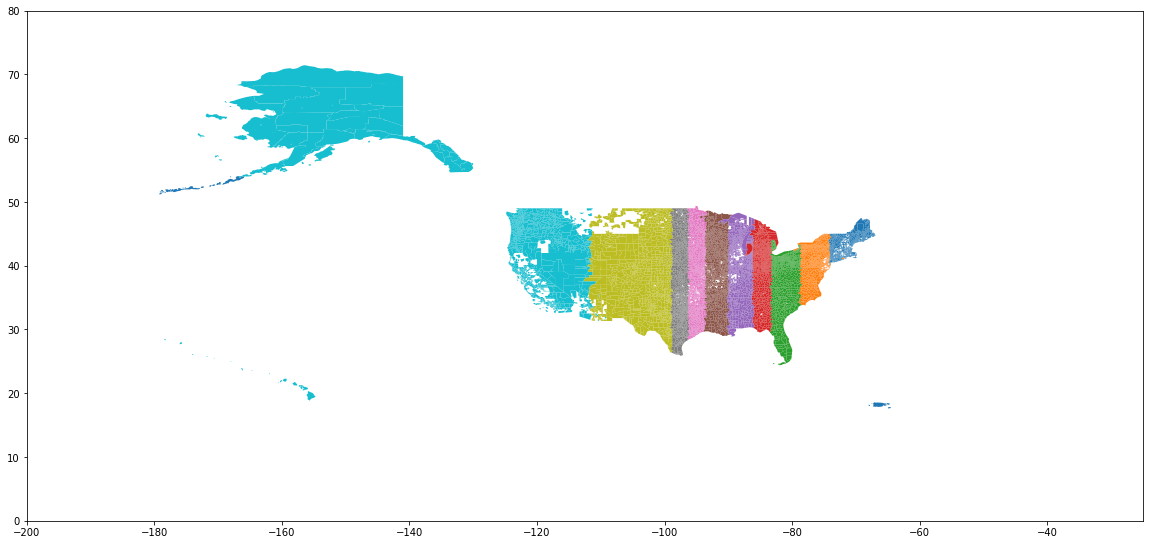

In [29]:
fig = map_data.plot(column='INTPTLON', figsize = (20,20))

plt.xlim([-200,-25])
plt.ylim([0,80])

plt.show()